In [1]:
import cv2
import numpy as np
from skimage import io, color, restoration, img_as_ubyte
import matplotlib.pyplot as plt

def data_processing(ref_s, ref_i, unkown, label):
    R = io.imread(ref_s)
    R_D = io.imread(ref_i)
    U_D = io.imread(unkown)
    R = color.rgb2gray(R)
    R_D = color.rgb2gray(R_D)
    U_D = color.rgb2gray(U_D)
    R_D_np = img_as_ubyte(R_D)
    U_np = img_as_ubyte(U_D)
    PSF, _ = restoration.unsupervised_wiener(R_D, R)
    plt.figure()
    plt.imshow(np.abs(PSF), cmap='hot')
    plt.axis('off')
    plt.savefig('figures\点扩散函数_PSF_2_' + label + '.png')
    U_restored, _ = restoration.unsupervised_wiener(U_D, PSF)
    plt.figure()
    plt.imshow(U_restored, cmap='hot')
    plt.axis('equal')
    plt.savefig('figures\恢复图像_维纳滤波_PSF_2_' + label + '.png')
    threshold = 0.25
    U_th = np.clip(U_restored, 0, 1)
    U_th[U_th > threshold] = 1
    plt.figure()
    plt.imshow(U_th, cmap='hot')
    plt.axis('equal')
    plt.savefig('figures\阈值分割图像_PSF_2_' + label + '.png')
    cross_corr = cv2.matchTemplate(R_D_np, U_np, cv2.TM_CCOEFF_NORMED)
    plt.figure()
    plt.imshow(cross_corr, cmap='hot', vmin=-1, vmax=1)
    plt.axis('off')
    plt.savefig('figures\互相关系数图_PSF_2_' + label + '.png')
    return None

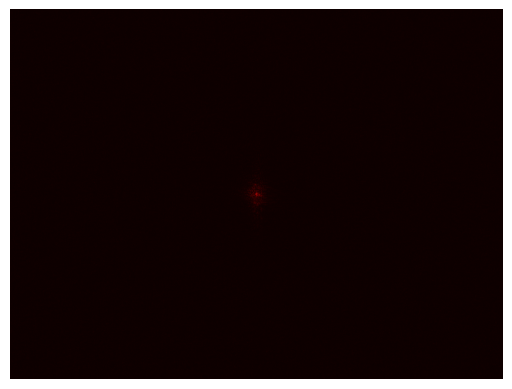

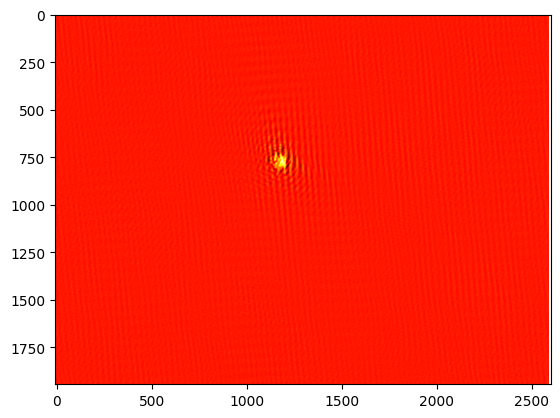

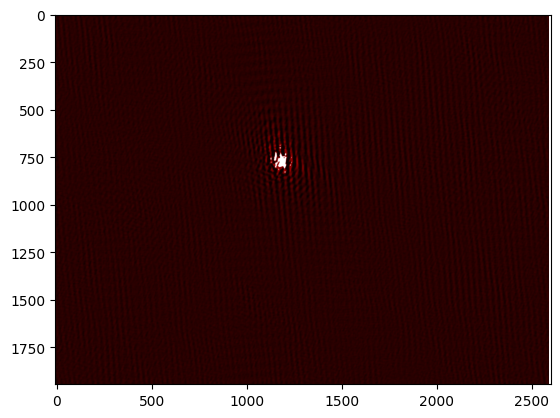

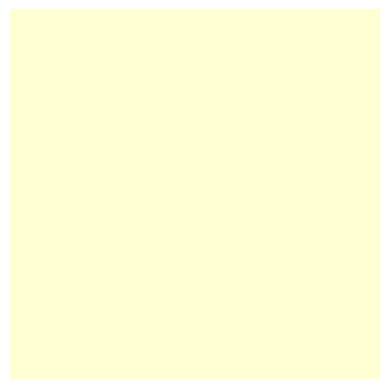

In [3]:
data_processing('不同散射片\\0.5°\参考物.png', '不同散射片\\0.5°\参考散斑.png', '不同散射片\\0.5°\未知物散斑.png', '4_1')